In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [20]:
df = pd.read_csv("../PROJECT-1/clean_data.csv",encoding='latin1')
df

,sex,fatal (y/n),activity,time of the day
0,F,N,Paddling,Evening
1,M,N,Surfing,Morning
2,M,N,Walking,Evening
3,M,N,Standing,Afternoon
4,M,N,Swimming,Afternoon
...,...,...,...,...
1321,M,Y,Wreck of the steamship Birkenhead,Night
1322,M,Y,Bathing,Afternoon
1323,M,N,Conch diver,Afternoon
1324,M,Y,Swimming,Night


In [26]:
gender_counts = df['sex'].value_counts()
mortal_gender_counts = df.groupby('sex')['fatal (y/n)'].apply(lambda x: (x == 'Y').sum())
mortality_gender = (mortal_gender_counts / gender_counts) * 100
mortality_gender

F    14.473684
M    23.861566
dtype: float64

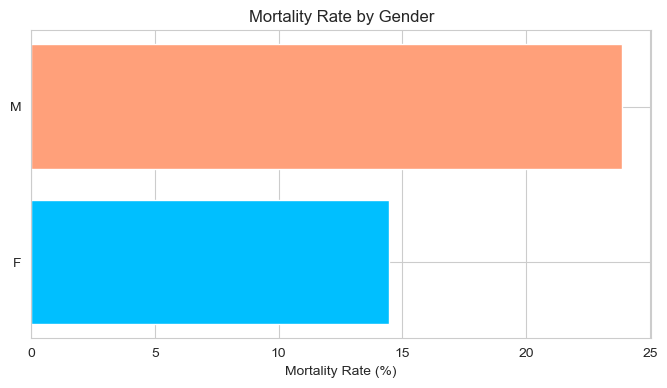

In [64]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.barh(mortality_gender.index, mortality_gender.values, color=['#00BFFF', '#FFA07A'])#00BFFF
ax.set_title('Mortality Rate by Gender')
ax.set_xlabel('Mortality Rate (%)')
plt.savefig('mortality_by_gender.png', dpi=300, bbox_inches='tight')


In [28]:
time_counts = df['time of the day'].value_counts()
mortal_time_counts = df.groupby('time of the day')['fatal (y/n)'].apply(lambda x: (x == 'Y').sum())
mortality_time = (mortal_time_counts / time_counts) * 100
mortality_time

Afternoon    23.824959
Evening      17.488789
Morning      21.739130
Night        34.615385
dtype: float64

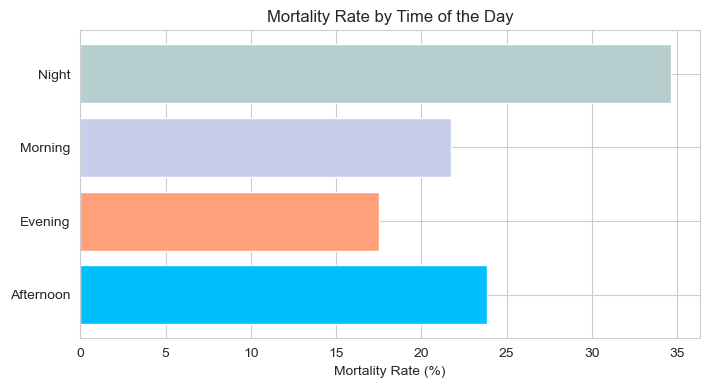

In [66]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.barh(mortality_time.index, mortality_time.values, color=['#00BFFF', '#FFA07A','#C7CEEA','#B7CECE'])#00BFFF
ax.set_title('Mortality Rate by Time of the Day')
ax.set_xlabel('Mortality Rate (%)')
plt.savefig('mortality_by_time.png', dpi=300, bbox_inches='tight')



In [40]:
mortal_df = df[df['fatal (y/n)'] == 'Y']

# Calculate the number of mortal shark attacks for each activity
mortal_activity_counts = mortal_df['activity'].value_counts().head(15)

# Calculate the percentage of mortal shark attacks for each activity in terms of the total number of mortal shark attacks
mortality_activity = (mortal_activity_counts / mortal_activity_counts.sum()) * 100

# Print the results
print(mortality_activity)

Swimming            34.705882
Surfing             14.705882
Spearfishing         7.647059
Body boarding        7.647059
Bathing              5.294118
Swimming             5.294118
Snorkeling           4.117647
Treading water       3.529412
Wading               2.941176
Standing             2.941176
Diving               2.941176
Body surfing         2.941176
Scuba diving         2.352941
Windsurfing          1.764706
Lifesaving drill     1.176471
Name: activity, dtype: float64


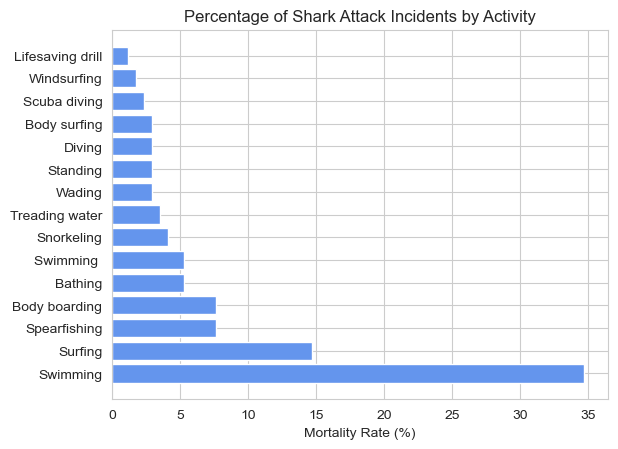

In [68]:
fig,plt.barh(mortality_activity.index, mortality_activity.values, color='#6495ED')

# add labels and title to the plot
plt.xlabel('Mortality Rate (%)')
plt.title('Percentage of Shark Attack Incidents by Activity')
plt.savefig('mortality_by_activity.png', dpi=300, bbox_inches='tight')
